# Basic AI/DS lecture materials

The contents are as follows

** 1 |  Hierarchical clustering and dendrogram **

** 2 | K-Means method **

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 | Hierarchical clustering and dendrogram
In this section, we will classify objects hierarchically according to a given distance matrix and visualize the results in a dendrogram.

Run the following cell to create the distance function used in this section.

In [12]:
distance_matrix = np.matrix([
    [0, 2, 7, 3, 7],
    [2, 0, 4, 4, 6],
    [7, 4, 0, 2, 6],
    [3, 4, 2, 0, 3],
    [7, 6, 6, 3, 0]
])

The distance matrix represents the mutual distance of the five objects. 

To cluster these five objects by "scipy.cluster.hierarchy.linkages", we have to change the distance matrix to a form called "condenced" distance matrix

In [13]:
from scipy.spatial.distance import squareform
condensed_distance_matrix = squareform(distance_matrix)
condensed_distance_matrix

array([2, 7, 3, 7, 4, 4, 6, 2, 6, 3])

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(condensed_distance_matrix, method = "single")
Z

array([[0., 1., 2., 2.],
       [2., 3., 2., 2.],
       [5., 6., 3., 4.],
       [4., 7., 3., 5.]])

The following is an explanation of Z, the return value of linkage, from the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) of scipy.

> A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster. A cluster with an index less than  corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

By running the following cell, we can visualize the result Z of hierarchical clustering by dendrogram.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [2.0, 3.0, 3.0, 2.0],
  [0.0, 3.0, 3.0, 3.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0', 'C0']}

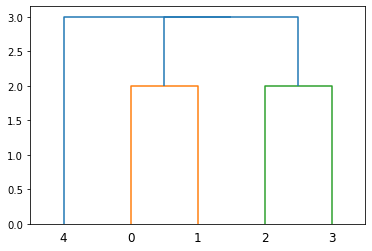

In [15]:
dendrogram(Z)

In the cell above, we are using single link to measure the distance between two clusters. Edit the cell below and try different ways to measure the distance between the clusters.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [2.0, 3.0, 3.0, 2.0],
  [0.0, 3.0, 3.0, 3.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0', 'C0']}

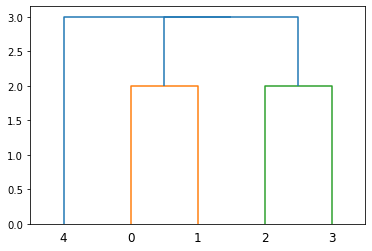

In [16]:
# ==============================================================
METHOD = 'single' # edit this line to change the method to mesure distance between 2 clusters
# METHOD = 'complete'
# METHOD = 'average'
# ==============================================================
Z = linkage(condensed_distance_matrix, method = METHOD)
dendrogram(Z)

## 2 | K-Means method

In this section, we will use the K-Means method to cluster the 158 country data represented by the two indicators Economic Freedom and GDP (or GDP PPP).

Before starting this section, please upload your data.csv to google colab.

Click on the folder icon on the left tab of Colab, and you will see the current directory and three icons.

Clicking on the leftmost of the three icons will open a screen for selecting a file to upload, so select data.csv.

（以下日訳）

このセクションを始める前に、data.csvをgoogle colabにアップロードしてください。

Colabの左側のタブのフォルダーアイコンをクリックすると、現在のディレクトリと3つのアイコンが表示されます。

3つのうち一番左のアイコンをクリックするとアップロードするファイルの選択画面が開くので、data.csvを選んでください。

Run the following cell to load the data used in this notebook.

In [17]:
df = pd.read_csv("data.csv").set_index("Country")

##### NOTE: 

In this section, data is handled through a module called "pandas", which manages data as a DataFrame type with one index and multiple columns.

See the link [here](https://pandas.pydata.org/) for more information on pandas.

The cell above has read the data from the csv and stored it in a variable called "df", which of course stands for data frame.

The data is indexed by the name of the nation and has the following three columns
- Economic Freedom
- GDP
- GDP PPP

The "head" method of the DataFrame type allows you to display and check the first 5 columns.

In [18]:
df.head()

,Economic Freedom,GDP,GDP PPP
Country,,,
Singapore,89.4,65233.282439,101375.775311
New Zealand,84.1,42084.353375,43952.548428
Australia,82.6,54907.101910,53320.269043
Switzerland,82.0,81993.727149,70989.258126
Ireland,80.9,78660.956463,88240.901029


Run the following cell to see the distribution of GDP and GDP PPP relative to the Economic Freedom of a nation.

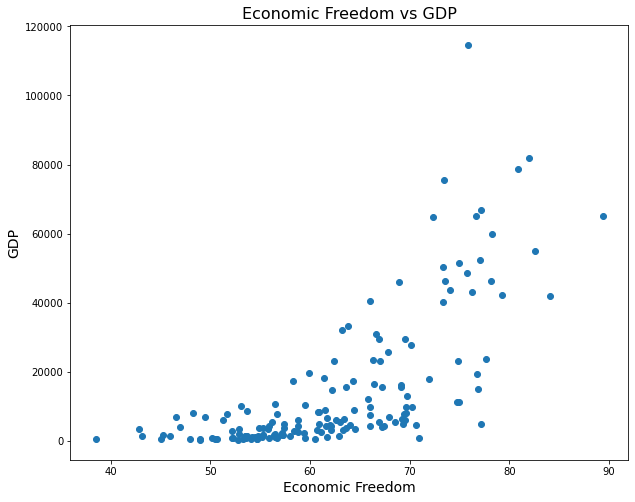

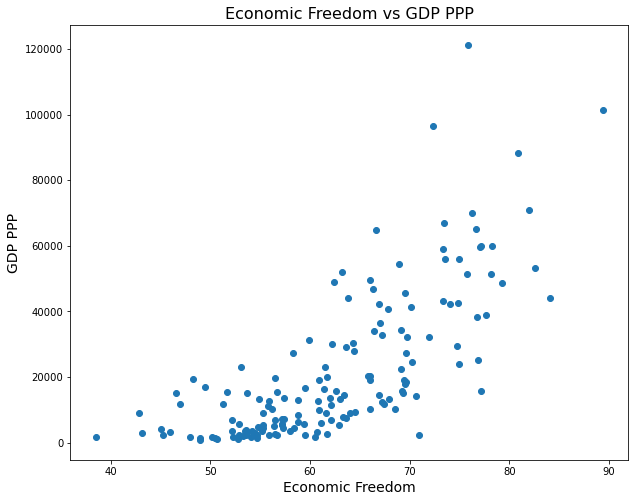

In [19]:
for data in ["GDP", "GDP PPP"]:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.scatter(df["Economic Freedom"], df[data])

    ax.set_title("Economic Freedom vs {}".format(data), size=16)
    ax.set_xlabel("Economic Freedom", size=14)
    ax.set_ylabel(data, size=14)

    plt.show()

Each variable has a different scale. Since this is often inconvenient, we perform a process called z-score normalization, which aligns the mean of the variables to 0 and the variance to 1.

In [20]:
df = (df - df.mean()) / (df.std() + 1e-7) # z-score normalization

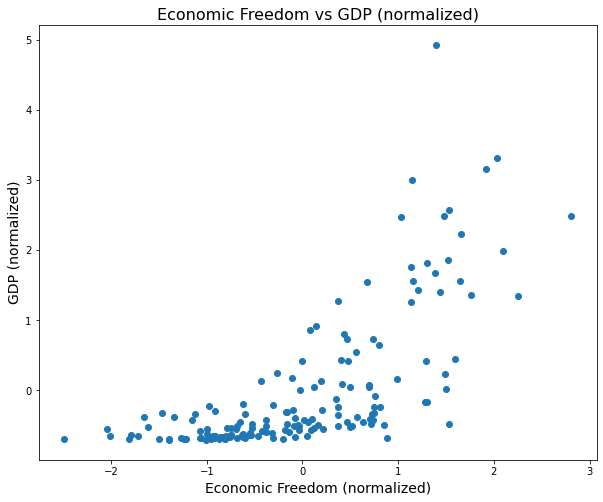

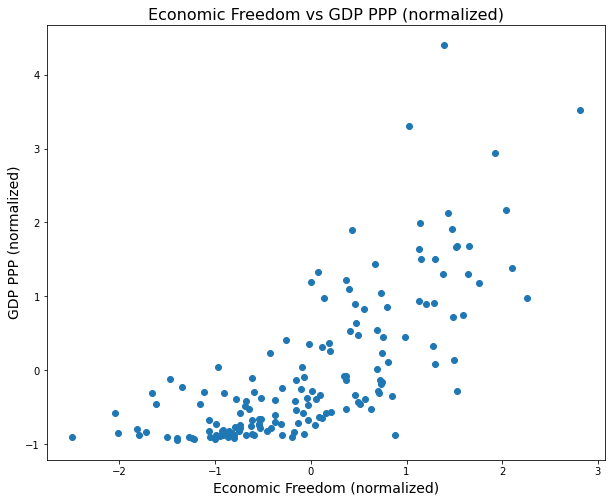

In [21]:
for data in ["GDP", "GDP PPP"]:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.scatter(df["Economic Freedom"], df[data])

    ax.set_title("Economic Freedom vs {} (normalized)".format(data), size=16)
    ax.set_xlabel("Economic Freedom (normalized)", size=14)
    ax.set_ylabel(data + " (normalized)", size=14)

    plt.show()

Split the data into two tables: df_GDP (Economic Freedom vs GDP) and df_GDP_PPP (Economic Freedom vs GDP PPP)

In [22]:
df_GDP = df[["Economic Freedom", "GDP"]]
df_GDP.head()

,Economic Freedom,GDP
Country,,
Singapore,2.808782,2.494102
New Zealand,2.256755,1.352369
Australia,2.100521,1.984802
Switzerland,2.038028,3.320748
Ireland,1.923456,3.156372


In [23]:
df_GDP_PPP = df[["Economic Freedom", "GDP PPP"]]
df_GDP_PPP.head()

,Economic Freedom,GDP PPP
Country,,
Singapore,2.808782,3.520716
New Zealand,2.256755,0.973545
Australia,2.100521,1.389077
Switzerland,2.038028,2.172835
Ireland,1.923456,2.938081


In the K-Means method, it is necessary to decide in advance how many clusters to classify the data into. In this example, we will cluster the data into 2 clusters.

You can change the number of clusters by changing the N_CLUSTERS variable in the bottom cell.

Run the following cell to see the results of clustering the country data and the location of the cluster center.

---

**The annotations of the country names may be difficult to see in the graph.**

**The x_min, x_max, y_min, and y_max in the cells indicate the area where the graph will be drawn. You can edit this section to zoom in on the area you want to see.**

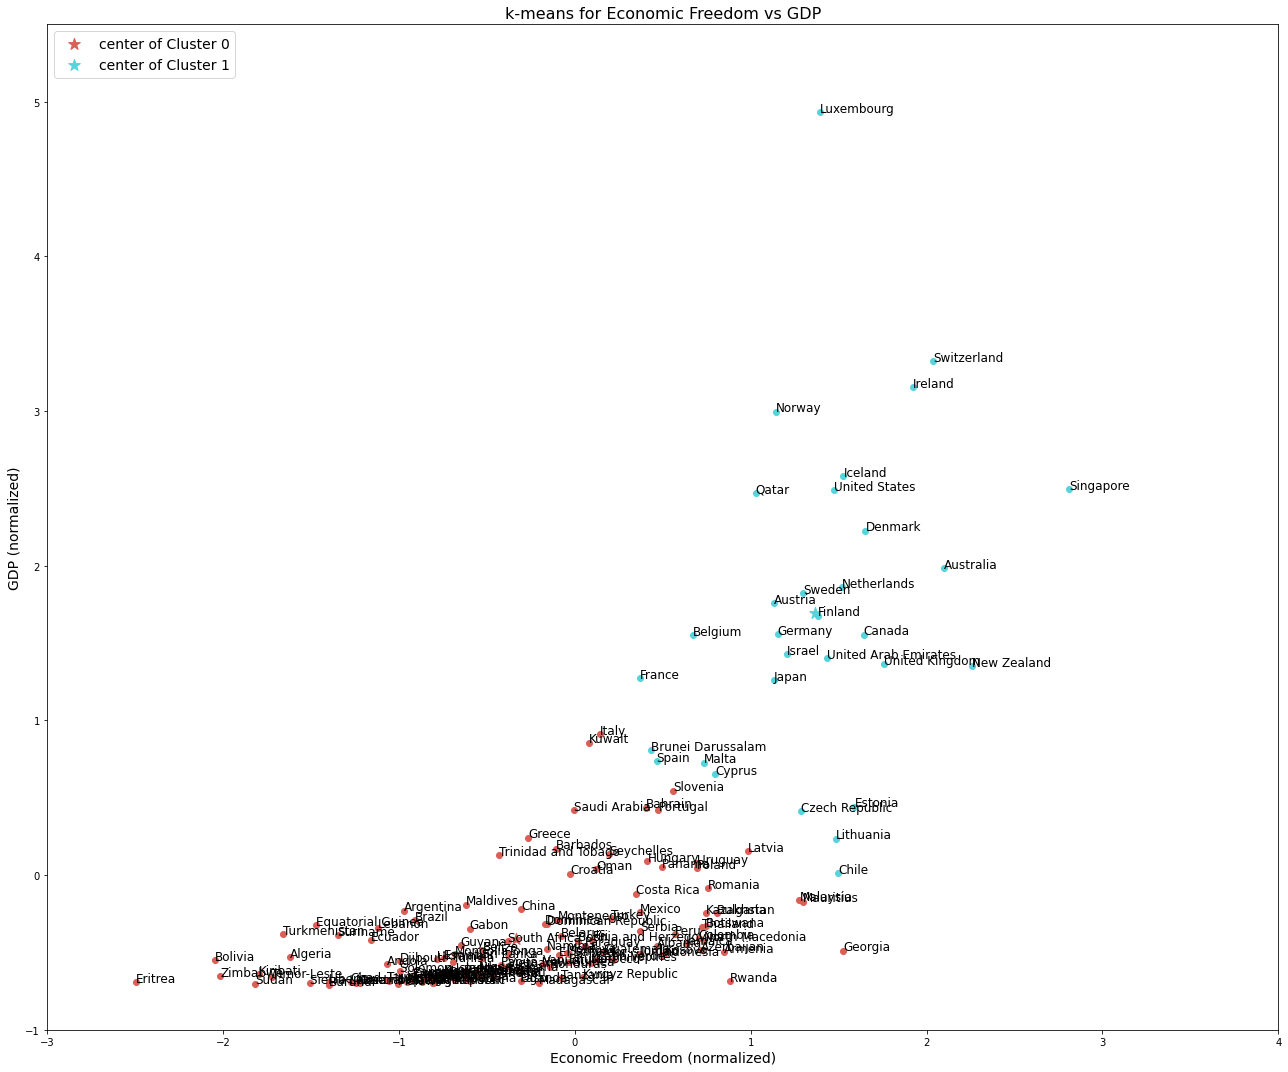

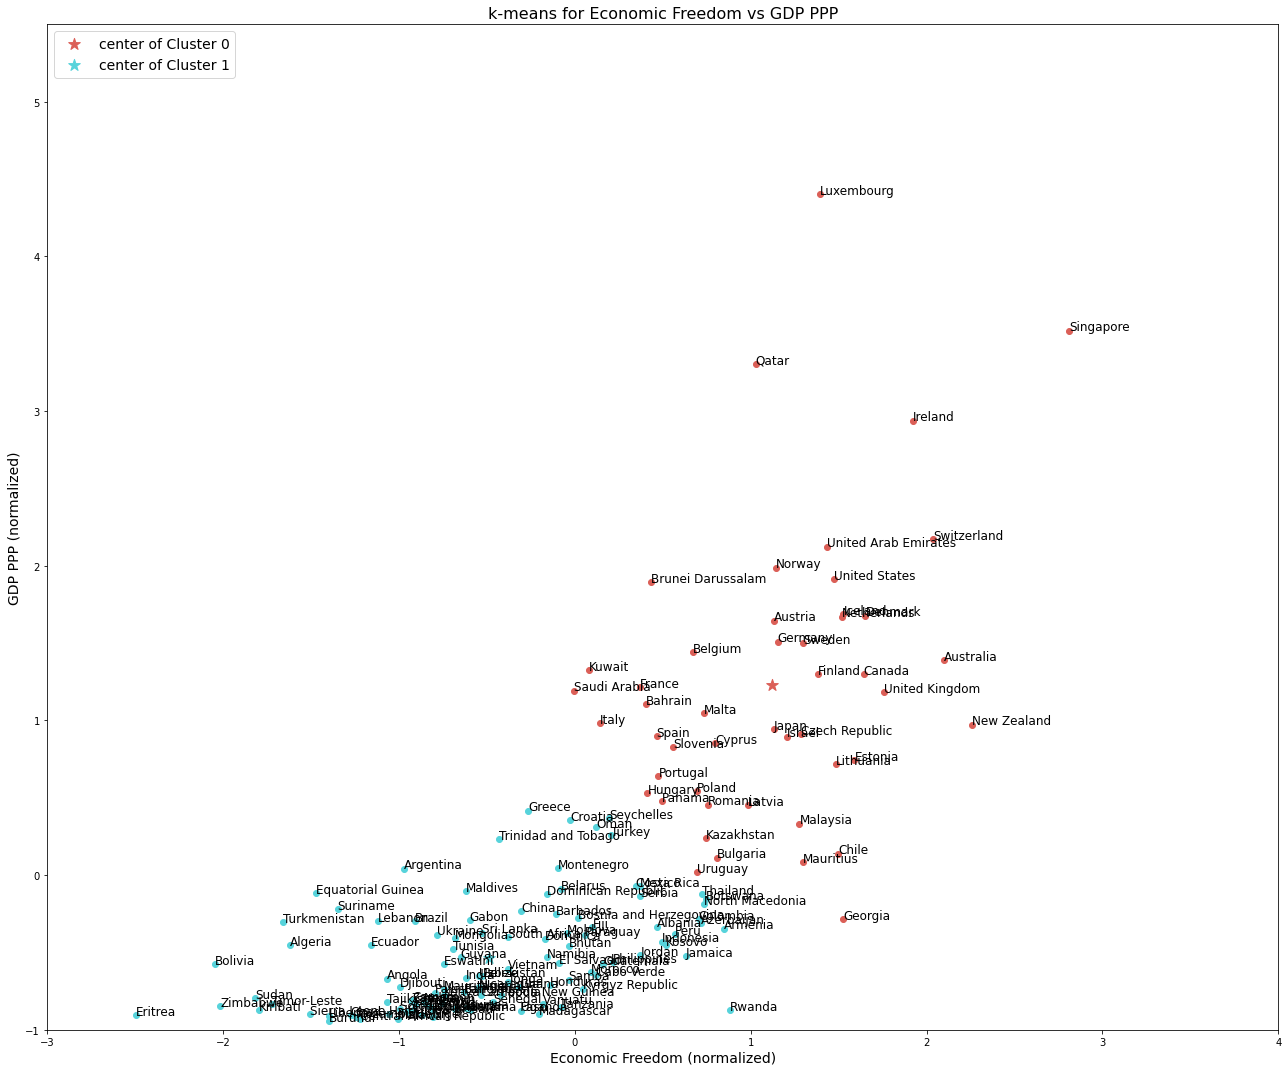

In [35]:
from sklearn.cluster import KMeans
# ==============================================================
N_CLUSTERS = 2 # edit this line to change the number of clusters
# N_CLUSTERS = 20
# ==============================================================

# ==============================================================
# edit these lines to zoom in on the area you want to see
x_min = -3
x_max = 4
y_min = -1
y_max = 5.5
# ==============================================================

kmeans_GDP = KMeans(n_clusters=N_CLUSTERS ,random_state=1).fit(df_GDP) # Do not change default random state
kmeans_GDP_PPP = KMeans(n_clusters=N_CLUSTERS, random_state=1).fit(df_GDP_PPP) # Do not change default random state

pred_GDP = kmeans_GDP.predict(df_GDP)
pred_GDP_PPP = kmeans_GDP_PPP.predict(df_GDP_PPP)

GDP_centers = kmeans_GDP.cluster_centers_
GDP_PPP_centers = kmeans_GDP_PPP.cluster_centers_

# colors = ["b", "g", "r", "c", "m", "y", "k", "lime", "deepskyblue", "darkorange"]
colors = sns.color_palette("hls", N_CLUSTERS)
# visualize result
for data, pred, centers, gdp_or_gdpppp in zip([df_GDP, df_GDP_PPP], [pred_GDP, pred_GDP_PPP], [GDP_centers, GDP_PPP_centers], ["GDP", "GDP PPP"]):
    fig, ax = plt.subplots(figsize=(18, 15))
    for i in range(N_CLUSTERS):
        scatter_x = data["Economic Freedom"][pred == i]
        scatter_y = data[gdp_or_gdpppp][pred == i]
        boolean_index = ((x_min<scatter_x) & (scatter_x<x_max) & (y_min<scatter_y) & (scatter_y<y_max))
        ax.scatter(scatter_x[boolean_index], scatter_y[boolean_index], color = colors[i], label = "")
        if (x_min < centers[i][0]) and (centers[i][0] < x_max) and (y_min < centers[i][1]) and (centers[i][1] < y_max):
            ax.scatter(centers[i][0], centers[i][1], s=150 , marker="*", color = colors[i],label = "center of Cluster {}".format(i))
            
        plt.savefig('{}'.format(i))
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title("k-means for Economic Freedom vs {}".format(gdp_or_gdpppp), size=16)
    ax.set_xlabel("Economic Freedom (normalized)", size=14)
    ax.set_ylabel("{} (normalized)".format(gdp_or_gdpppp), size=14)
    plt.legend(loc="upper left", fontsize=14)
    
    data_inside = data[(x_min < data["Economic Freedom" ]) & (data["Economic Freedom" ] < x_max) & (y_min < data[gdp_or_gdpppp]) & (data[gdp_or_gdpppp] < y_max)]
    for country in data_inside.index.values:
        plt.annotate(country, (data.loc[country,"Economic Freedom"], data.loc[country,gdp_or_gdpppp]),fontsize=12)
        plt.tight_layout()
    plt.show()
    

In the cell below, you can see the list of countries included in each clusters

In [25]:
for data, pred, gdp_or_gdpppp in zip([df_GDP, df_GDP_PPP], [pred_GDP, pred_GDP_PPP], ["GDP", "GDP PPP"]):
    print("="*20 + "Economic Freedom vs {} Cluster".format(gdp_or_gdpppp) + "="*20)
    for i in range(N_CLUSTERS):
        print(" "*30 + "Cluster {}".format(i) + " "*30 )
        print(data[pred == i].index.values)
        print("\n")

====================Economic Freedom vs GDP Cluster====================
                              Cluster 0                              
['Georgia' 'Mauritius' 'Malaysia' 'Latvia' 'Rwanda' 'Armenia' 'Bulgaria'
 'Romania' 'Kazakhstan' 'Botswana' 'North Macedonia' 'Thailand'
 'Azerbaijan' 'Colombia' 'Poland' 'Uruguay' 'Jamaica' 'Peru' 'Slovenia'
 'Kosovo' 'Indonesia' 'Panama' 'Portugal' 'Albania' 'Hungary' 'Bahrain'
 'Serbia' 'Jordan' 'Mexico' 'Costa Rica' 'Philippines' 'Turkey'
 'Seychelles' 'Guatemala' 'Italy' 'Oman' 'Cabo Verde' 'Fiji' 'Morocco'
 'Kuwait' 'Paraguay' 'Kyrgyz Republic' 'Bosnia and Herzegovina'
 'Saudi Arabia' 'Croatia' 'Bhutan' 'Samoa' 'Moldova' 'Belarus' 'Tanzania'
 'El Salvador' 'Montenegro' 'Barbados' 'Honduras' 'Dominican Republic'
 'Namibia' 'Dominica' 'Vanuatu' 'Madagascar' 'Greece' 'Uganda' 'China'
 'Ghana' 'Vietnam' 'South Africa' 'Tonga' 'Papua New Guinea'
 'Trinidad and Tobago' 'Senegal' 'Belize' 'Sri Lanka' 'Cambodia'
 'Uzbekistan' 'Nicaragua' 'Nigeria' 